In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("titanic-passengers.csv" , sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.corr()
#the correlation matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


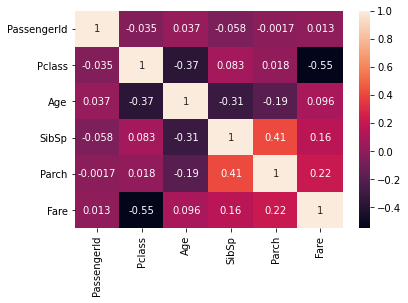

In [ ]:
import seaborn as sns
sns.heatmap( df.corr() , annot=True)
#Heatmap

In [ ]:
df['Pclass'].fillna(df['Pclass'].mode() , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Cabin'].isnull().sum()

687

In [ ]:
nbrE=len(df['Cabin'])
print("number of elements is=" , nbrE)
print( df['Cabin'].value_counts() )
df['Cabin'].fillna('G6' , inplace=True)

number of elements is= 891
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
C128           1
C86            1
B86            1
D50            1
D6             1
Name: Cabin, Length: 147, dtype: int64


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

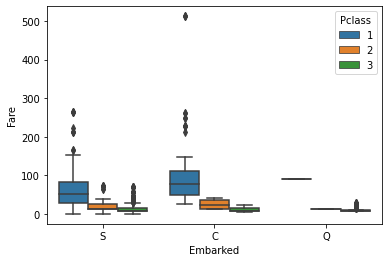

In [ ]:
sns.boxplot(x="Embarked" , y="Fare" , hue="Pclass" , data=df)
plt.show()

In [ ]:
#we can notice from this boxplot comparision that we can not fill the missing values with the 'Q' 
# but with 'C' or 'S' and we can notice that the 'C' is the best option(he includes all the classes perfectly)
# or simply we could have just drop em as we just have two missing values

In [ ]:
df['Embarked'].fillna('C' , inplace=True)

In [ ]:
df.isnull().sum()
#Now that we have 0 NaN value we can trandform categorical data to numerical one

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
sexD={'male' : 1 ,'female' : 0}
df['Sex'].replace(sexD,inplace=True)
SurviveD={'Yes' : 1 , 'No' :0 }
df['Survived'].replace(SurviveD , inplace=True)
EmbarkedD={'S':0 , 'C':1 , 'Q':2}
df['Embarked'].replace(EmbarkedD , inplace=True)

In [ ]:
def THECHILDREN(prsn):
  (age , sex) = prsn
  if age<16:
    return 2
  else:
      return sex

df['Person']=df[['Age','Sex']].apply(THECHILDREN , axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,0,1.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0,1.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,0,1.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,0,0.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0,1.0


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030444,0.016228
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.111203,-0.325753
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.040138,0.196793
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.121266,0.639773
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.012971,-0.354507
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.061591,0.136003
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.080277,0.055682
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.065492,-0.146290
Embarked,-0.030444,0.111203,0.040138,-0.121266,0.012971,-0.061591,-0.080277,0.065492,1.000000,-0.105910
Person,0.016228,-0.325753,0.196793,0.639773,-0.354507,0.136003,0.055682,-0.146290,-0.105910,1.000000


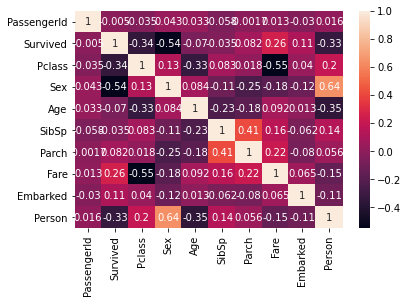

In [ ]:
import seaborn as sns
sns.heatmap( df.corr() , annot=True)

In [ ]:
#The most important features are 'Age' , 'Sex' , 'Pclass' 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


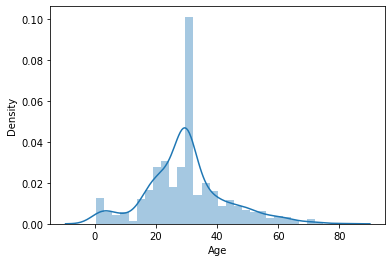

In [ ]:
sns.distplot(df['Age'] , kde=True)
#AGE'S PLOT

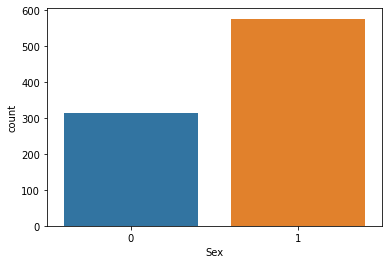

In [ ]:
sns.countplot(x='Sex' , data=df)
#SEX'S PLOT

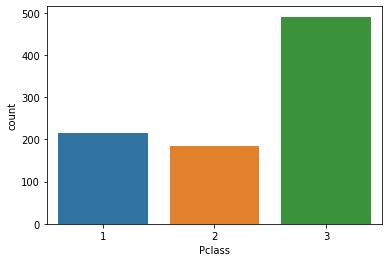

In [ ]:
sns.countplot(x='Pclass' , data=df)

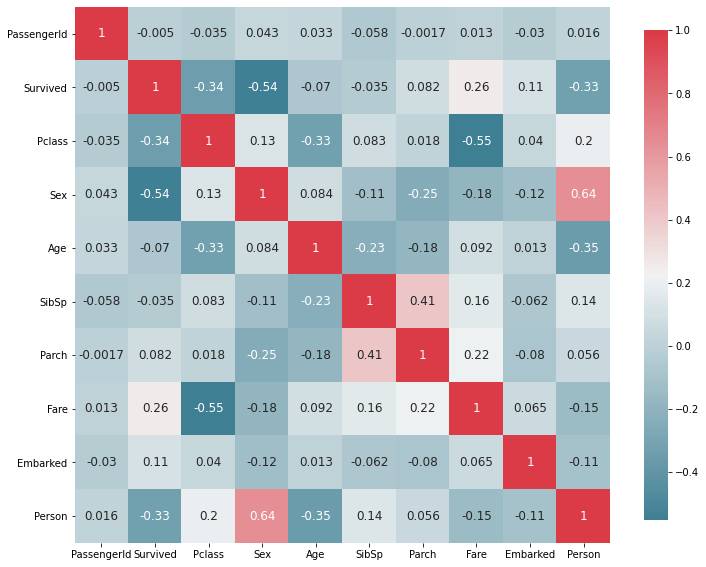

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(df)

In [ ]:
# As the heatmap is based on the correlation between each two variables we can conclude that :
#-The chance of survive and (sex or person) has the strongest correlation (strongest dependence) that means that sex is the most influential
#   factor in survival
#-The second most influential factor in survival is the class ! with (cor=0,34)
#-And the surprising thing is that the age didnt had much influence in survival !

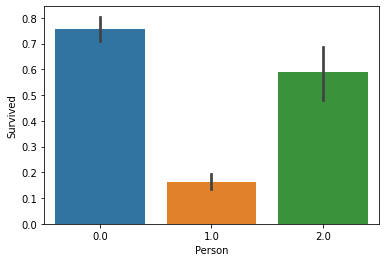

In [ ]:
sns.barplot(x='Person' , y='Survived' , data=df)

In [ ]:
#from the last two "diagrams" we can conclude that:
# women and children are the ones who survived the most comparing to men
# the correlation between age and sex is so small -negligible- (0,093) that means that they have a strong independence

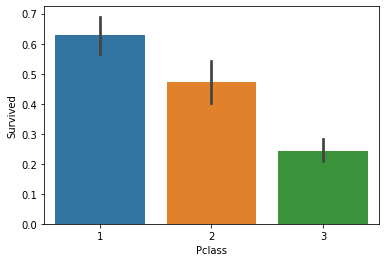

In [ ]:
sns.barplot(x='Pclass' , y='Survived' , data=df)
#The first class are the people who survived the most contrary to the third class (1>2>3)

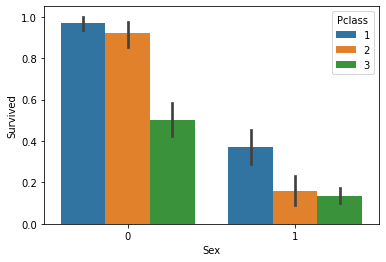

In [ ]:
sns.barplot(x='Sex', y='Survived' , hue='Pclass' , data=df)
#it confirms that the sex and the class were the most influential factors in survival

In [ ]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,0,1.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0,1.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,0,1.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,0,0.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0,1.0


In [ ]:
def TITLE(N):
  S = N.split(',')
  T=S[1].split('.')
  return T[0]

df['Title']=df['Name'].apply(TITLE )
 

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,0,1.0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0,1.0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,0,1.0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,0,0.0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,1,2.0,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,1,1.0,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,0,0.0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,0,1.0,Mr


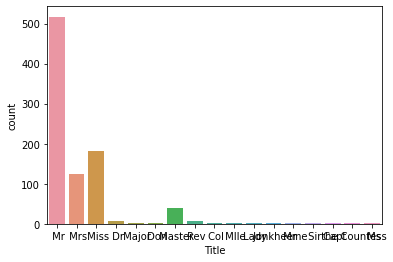

In [ ]:
sns.countplot(x='Title' , data=df)

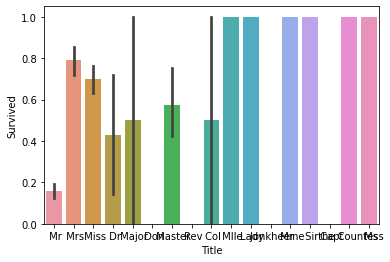

In [ ]:
sns.barplot(x='Title' , y='Survived' , data=df)

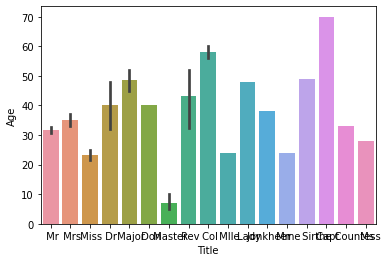

In [ ]:
sns.barplot(x='Title' , y='Age' , data=df)

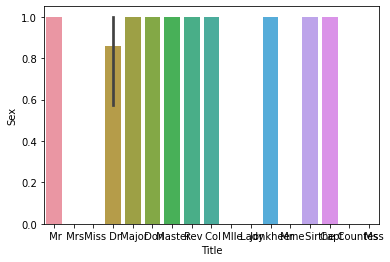

In [ ]:
sns.barplot(x='Title' , y='Sex' , data=df)

In [ ]:
Title_Dictionary = {

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer" ,

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty" ,

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs" ,

                    " Master" :    "Master"

                    }
df['Title'].replace(Title_Dictionary , inplace=True)

In [ ]:
df['Title'].unique()

array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

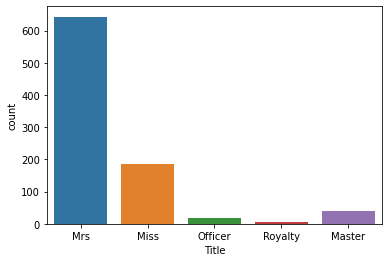

In [ ]:
sns.countplot(x='Title' , data=df)

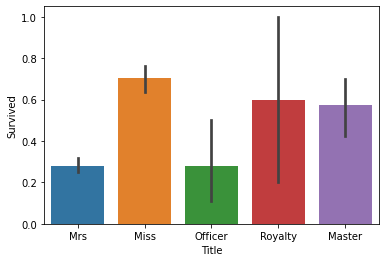

In [ ]:
sns.barplot(x='Title' , y='Survived' , data=df)

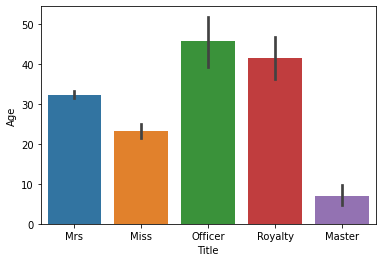

In [ ]:
sns.barplot(x='Title' , y='Age' , data=df)

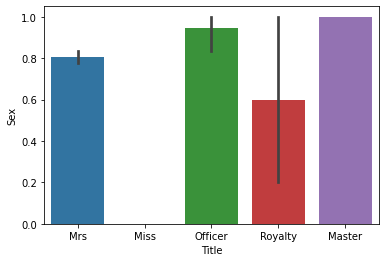

In [ ]:
sns.barplot(x='Title' , y='Sex' , data=df)

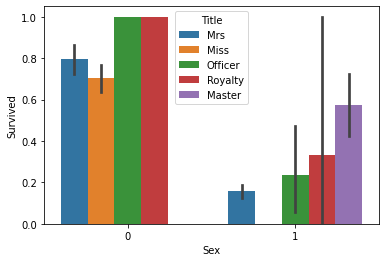

In [ ]:
sns.barplot(x='Sex', y='Survived' , hue='Title' , data=df)

In [ ]:
df['FamilySize']=df['Parch']+df['SibSp']+1

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,0,1.0,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0,1.0,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,0,1.0,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,0,0.0,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0,1.0,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,1,2.0,Mrs,2
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,1,1.0,Mrs,1
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,0,0.0,Miss,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,0,1.0,Mrs,1


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030444,0.016228,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.111203,-0.325753,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.040138,0.196793,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.121266,0.639773,-0.200988
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.012971,-0.354507,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.061591,0.136003,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.080277,0.055682,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.065492,-0.146290,0.217138
Embarked,-0.030444,0.111203,0.040138,-0.121266,0.012971,-0.061591,-0.080277,0.065492,1.000000,-0.105910,-0.082200
Person,0.016228,-0.325753,0.196793,0.639773,-0.354507,0.136003,0.055682,-0.146290,-0.105910,1.000000,0.120771


In [ ]:
#Familysize isnt a fonctional feature because we notice that it has a very very weak correlation with "survived " 

**Decision Tree & Random Forest :**

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier

**1) - Apply decision tree :**

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['Sex','Pclass','Age']]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.8156424581005587
f1 score :  0.7518796992481203
precision_score :  0.78125


**2) - Plot your decision tree :**

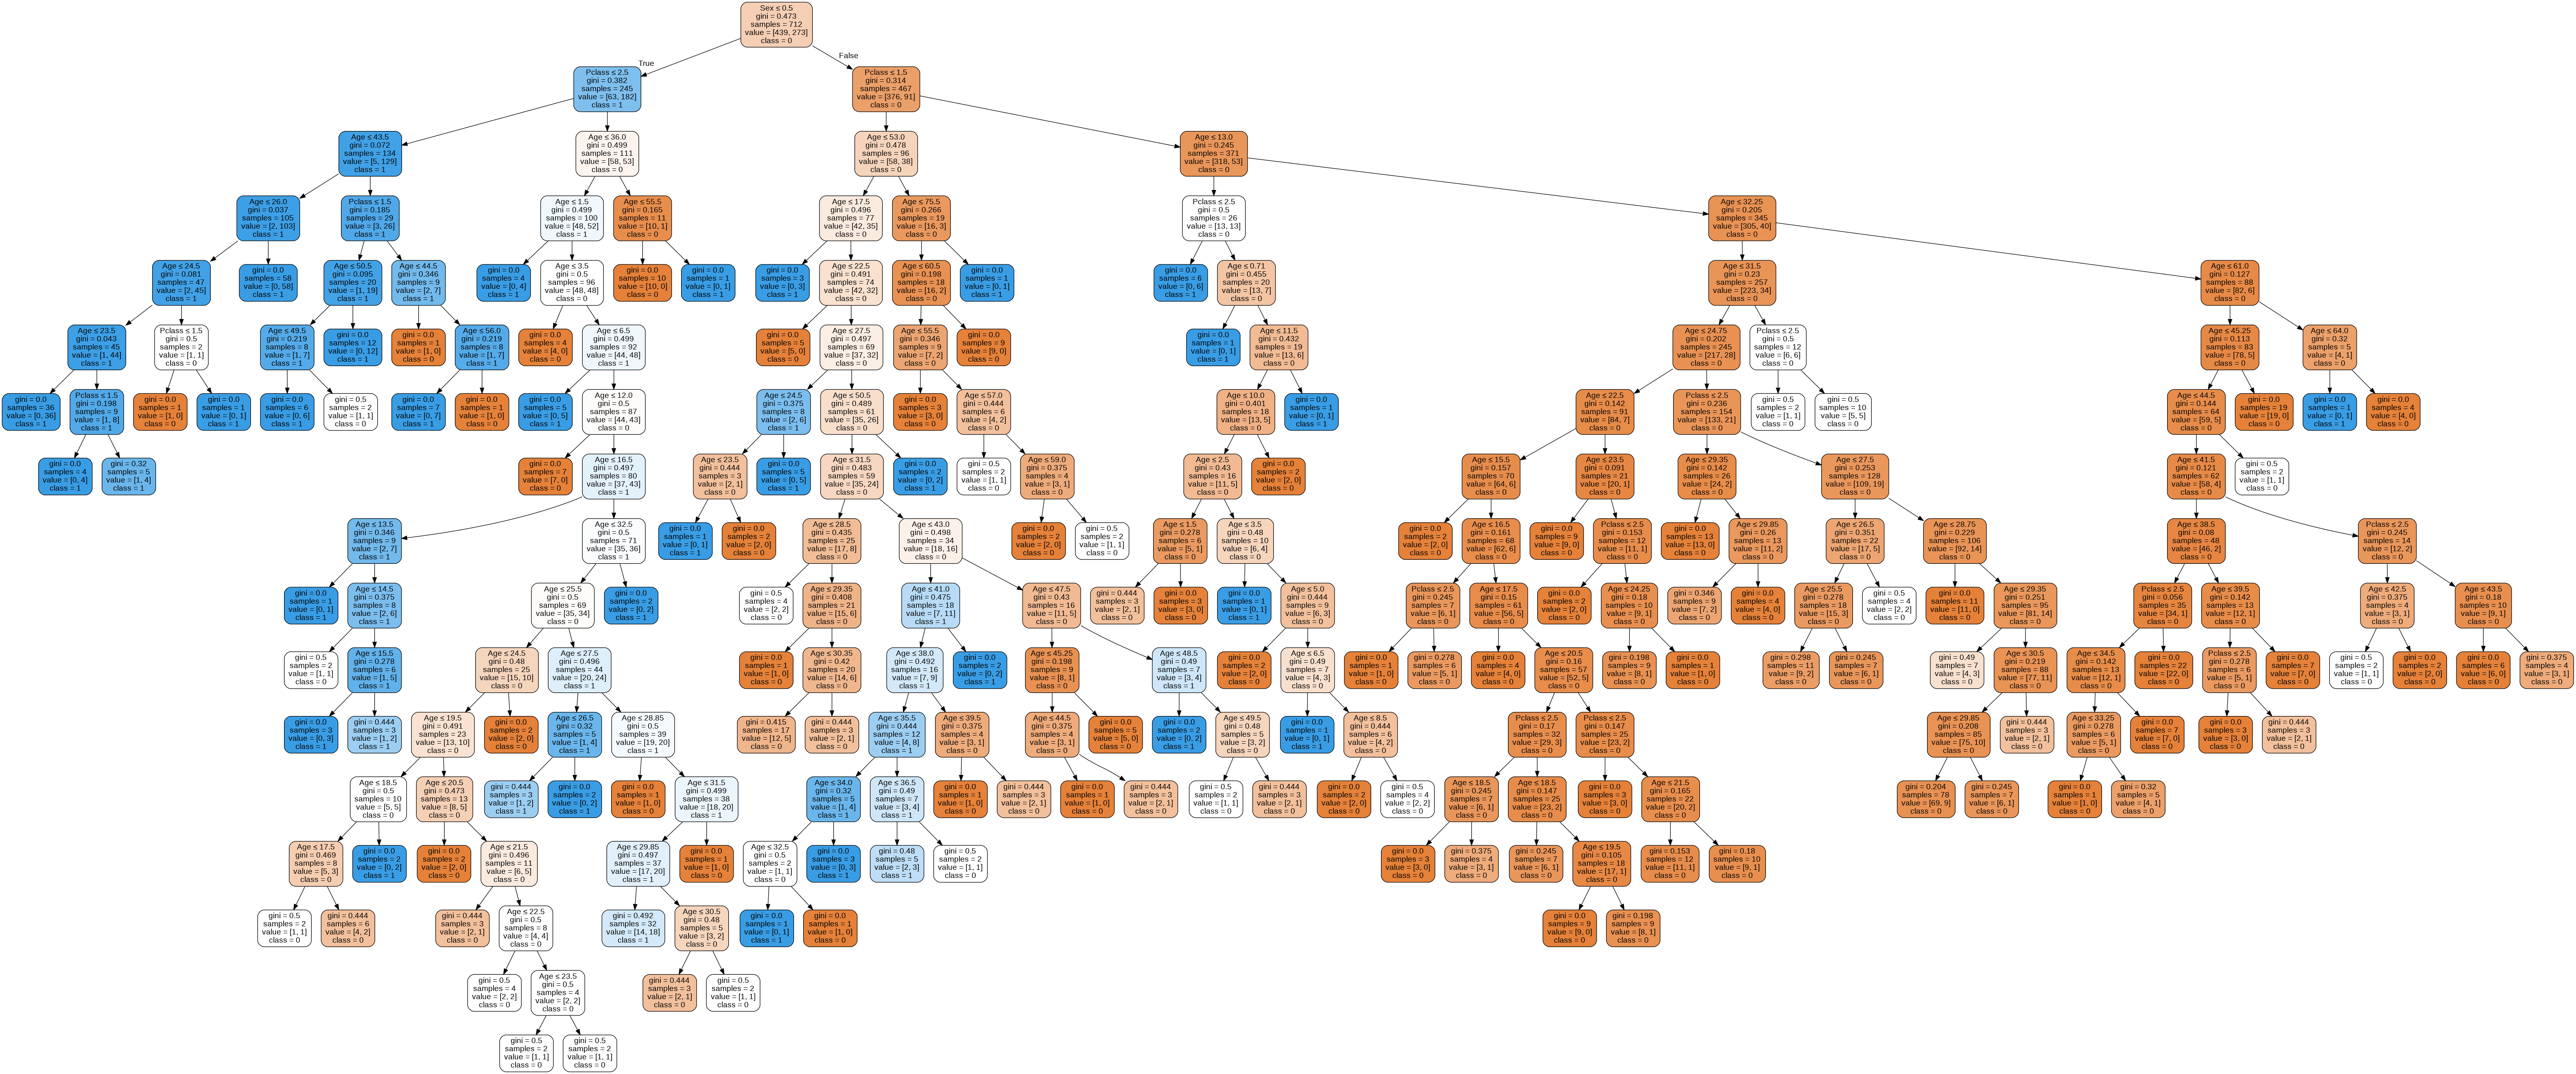

In [ ]:
dot_data = StringIO()
feature_cols = ['Sex' ,'Pclass','Age']
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

**3) - Change the decision tree parameters :**

In [124]:
# "criterion" by default = gini , and "splitter" by default is best so we will change em
model = DecisionTreeClassifier(criterion="entropy", splitter="random")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


**4) - Calculate the new accuracy and compare it with the previous results:**

In [123]:
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.8100558659217877
f1_score :  0.7462686567164178
precision_score :  0.7692307692307693


In [ ]:
# we notice that the results we got after changing two parameters of the dicision tree are slightly smaller than the first results

**5) - Use random forest then change the number of estimators:**

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

x=df[['Sex','Pclass','Age']]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('f1 score : ', metrics.f1_score(y_test,y_pred))
print('precision_score : ', metrics.precision_score(y_test,y_pred))


Accuracy: 0.8379888268156425
f1 score :  0.7943262411347518
precision_score :  0.7777777777777778


**6) - Random Forest with different number of estimators :**

In [135]:
model = RandomForestClassifier(n_estimators=300)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('f1 score : ', metrics.f1_score(y_test,y_pred))
print('precision_score : ', metrics.precision_score(y_test,y_pred))

Accuracy: 0.8156424581005587
f1 score :  0.762589928057554
precision_score :  0.7571428571428571


In [ ]:
# we notice that the results we got after increasing the number of the estimators (300) are smaller than the brivious results (100 by default)